In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [62]:
df.duplicated().sum()

1081

In [69]:
df = df.drop_duplicates()

In [70]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [72]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [73]:
# creating a fraud frequency time series

# dividing the time column into bins and measuring the fraud counts for the respective bins

time_bins = np.linspace(min(df['Time']),max(df['Time']), 21)
counts = np.zeros(len(time_bins)-1)

i = 0
_ = df[df['Class'] == 1]['Time']

for x in _:

    if x > time_bins[i+1]:
        i += 1
    
    counts[i] += 1
     
fraud_series = pd.DataFrame({'Time': time_bins[1:].round(), 'Fraud cases': counts})

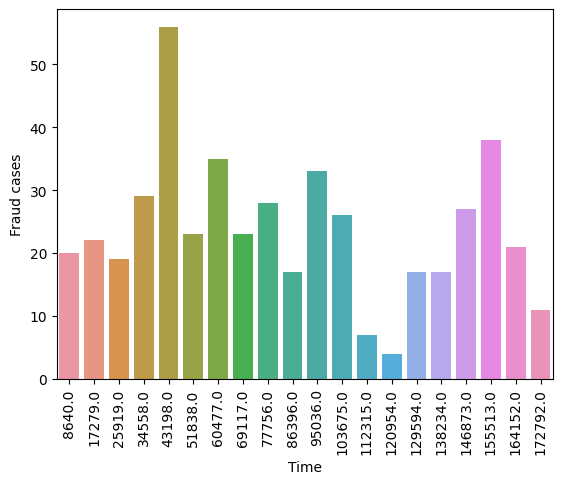

In [74]:
sns.barplot(data=fraud_series, x='Time', y='Fraud cases')
plt.xticks(rotation=90);

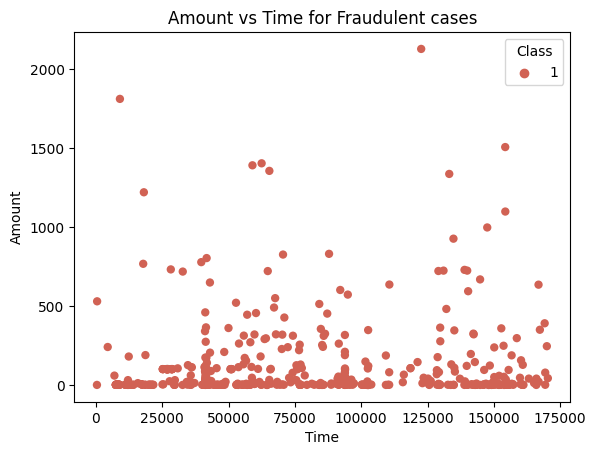

In [75]:
sns.scatterplot(data=df[df['Class']==1], x='Time', y='Amount', hue='Class', linewidth=0, palette=['#d16254'])
plt.title('Amount vs Time for Fraudulent cases');

In [76]:
df[df['Amount'] == 0]['Class'].value_counts()

Class
0    1783
1      25
Name: count, dtype: int64

In [77]:
df.corr()['Class'][:-1].abs().sort_values()

V25       0.003202
V15       0.003300
V13       0.003897
V26       0.004265
V22       0.004887
Amount    0.005777
V23       0.006333
V24       0.007210
V28       0.009682
Time      0.012359
V20       0.021486
V27       0.021892
V21       0.026357
V8        0.033068
V19       0.033631
V6        0.043915
V2        0.084624
V5        0.087812
V9        0.094021
V1        0.094486
V18       0.105340
V4        0.129326
V11       0.149067
V7        0.172347
V3        0.182322
V16       0.187186
V10       0.206971
V12       0.250711
V14       0.293375
V17       0.313498
Name: Class, dtype: float64

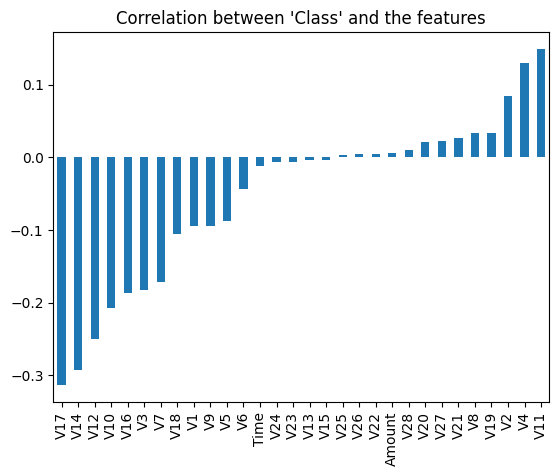

In [78]:
df.corr()['Class'][:-1].sort_values().plot(kind='bar')
plt.title('Correlation between \'Class\' and the features');

### Data preparation

In [79]:
X = df.iloc[:,1:-1]
y = df['Class']

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic regression

In [83]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

In [88]:
param_grid = {'penalty': ['elasticnet'],
              'C': np.linspace(0.5,0.9,5),
              'class_weight': ['balanced'],
              'solver': ['saga'],
              'l1_ratio': np.linspace(0.2,0.4,4)}

In [85]:
grid = GridSearchCV(log_model, param_grid)

grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.3, 0.7, 1, 100],
                         'class_weight': ['balanced'],
                         'l1_ratio': [0.0, 0.3333333333333333,
                                      0.6666666666666666, 1.0],
                         'penalty': ['elasticnet'], 'solver': ['saga']})

In [86]:
grid.best_params_

{'C': 0.7,
 'class_weight': 'balanced',
 'l1_ratio': 0.3333333333333333,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [87]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])